In [1]:
import numpy as np
import torch
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import pytorch_train_mlp as pyMLP 
import train_mlp_numpy as npMLP
import time as tm

In [2]:
DNN_HIDDEN_UNITS_DEFAULT = '20'
LEARNING_RATE_DEFAULT = 1e-2
MAX_EPOCHS_DEFAULT = 1500
EVAL_FREQ_DEFAULT = 10

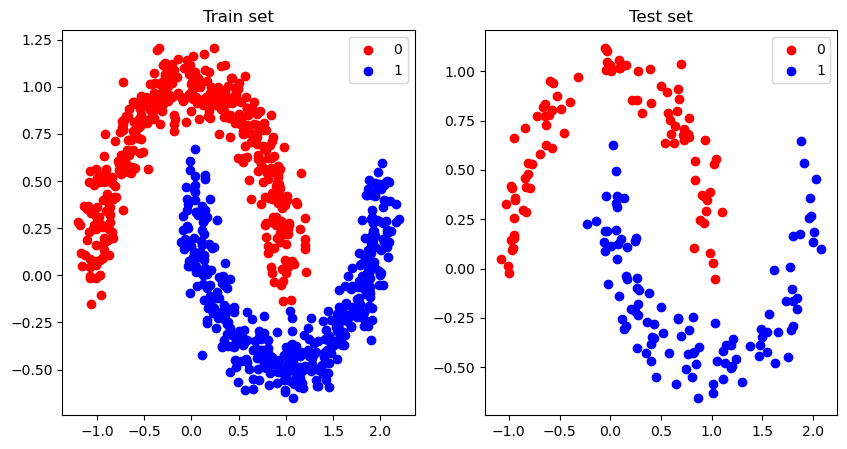

(800, 2)
(800,)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Generate data:第一种make_moons
X, y = make_moons(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Visualize the data,两张图，一张测试集，一张训练集
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='1')
plt.title('Train set')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='1')
plt.title('Test set')
plt.legend()
plt.show()

print(X_train.shape)
print(y_train.shape)


In [4]:
# 将数据放入npMLP中
# one-hot编码
one_hot_encoder = OneHotEncoder(categories='auto')
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = one_hot_encoder.transform(y_test.reshape(-1, 1)).toarray()
# 训练模型
a = tm.time()
accuracy_list,accuracy_list_test,time,loss_list,loss_list_test = npMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test,False,1)
print('numpy time:',tm.time()-a)

Step: 0, Loss: 36.08172234522872, Accuracy: 0.935
Step: 10, Loss: 6.985286065832448, Accuracy: 0.99
Step: 20, Loss: 3.5822529278153654, Accuracy: 1.0
Step: 30, Loss: 2.20224922961501, Accuracy: 1.0
Step: 40, Loss: 1.929246691034638, Accuracy: 1.0
Step: 50, Loss: 1.6066952829319507, Accuracy: 1.0
Step: 60, Loss: 1.9344670664545018, Accuracy: 1.0
Step: 70, Loss: 1.0421635183725102, Accuracy: 1.0
Step: 80, Loss: 0.9516078997357482, Accuracy: 1.0
Step: 90, Loss: 0.9614027536636522, Accuracy: 1.0
Step: 100, Loss: 0.746625411023218, Accuracy: 1.0
Step: 110, Loss: 0.6864377952867773, Accuracy: 1.0
Step: 120, Loss: 0.5627853766354062, Accuracy: 1.0
Step: 130, Loss: 0.6728061149881801, Accuracy: 1.0
Step: 140, Loss: 0.4904286080898375, Accuracy: 1.0
Step: 150, Loss: 0.7683665539426755, Accuracy: 1.0
Step: 160, Loss: 0.49235169716078986, Accuracy: 1.0
Step: 170, Loss: 0.7879421747159846, Accuracy: 1.0
Step: 180, Loss: 0.46061406851026615, Accuracy: 1.0
Step: 190, Loss: 0.4535692156344273, Accura

In [5]:
# 将数据放入pyMLP中
a = tm.time()
Py_accuracy_list,Py_accuracy_list_test,Py_loss_list,Py_loss_list_test = pyMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test)
print('pytorch time:',tm.time()-a)

Step:  0 train_Loss:  0.2784295380115509 train_Accuracy:  0.8687499761581421
Step:  0 test_Loss:  0.2950113117694855 test_Accuracy:  0.8550000190734863
Step:  10 train_Loss:  0.1531480848789215 train_Accuracy:  0.9387500286102295
Step:  10 test_Loss:  0.14459678530693054 test_Accuracy:  0.949999988079071
Step:  20 train_Loss:  0.06971461325883865 train_Accuracy:  0.9737499952316284
Step:  20 test_Loss:  0.05952777341008186 test_Accuracy:  0.9850000143051147
Step:  30 train_Loss:  0.03696852922439575 train_Accuracy:  0.9950000047683716
Step:  30 test_Loss:  0.03234529122710228 test_Accuracy:  0.9900000095367432
Step:  40 train_Loss:  0.024389944970607758 train_Accuracy:  0.9975000023841858
Step:  40 test_Loss:  0.02038532681763172 test_Accuracy:  1.0
Step:  50 train_Loss:  0.018821867182850838 train_Accuracy:  1.0
Step:  50 test_Loss:  0.016946587711572647 test_Accuracy:  1.0
Step:  60 train_Loss:  0.014988511800765991 train_Accuracy:  0.9987499713897705
Step:  60 test_Loss:  0.01374203

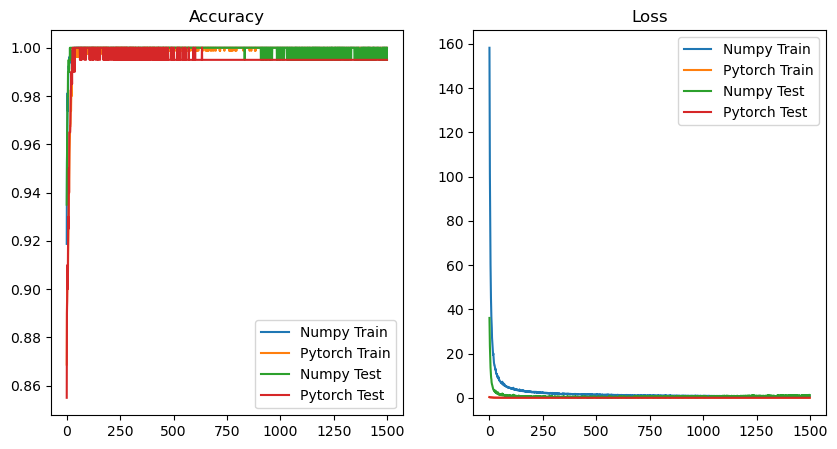

In [6]:
# 画图将两个模型的结果进行对比，分别画出训练集和测试集的准确率和损失函数
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy_list, label='Numpy Train')
plt.plot(Py_accuracy_list, label='Pytorch Train')
plt.plot(accuracy_list_test, label='Numpy Test')
plt.plot(Py_accuracy_list_test, label='Pytorch Test')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss_list, label='Numpy Train')
plt.plot(Py_loss_list, label='Pytorch Train')
plt.plot(loss_list_test, label='Numpy Test')
plt.plot(Py_loss_list_test, label='Pytorch Test')
plt.title('Loss')
plt.legend()
plt.show()

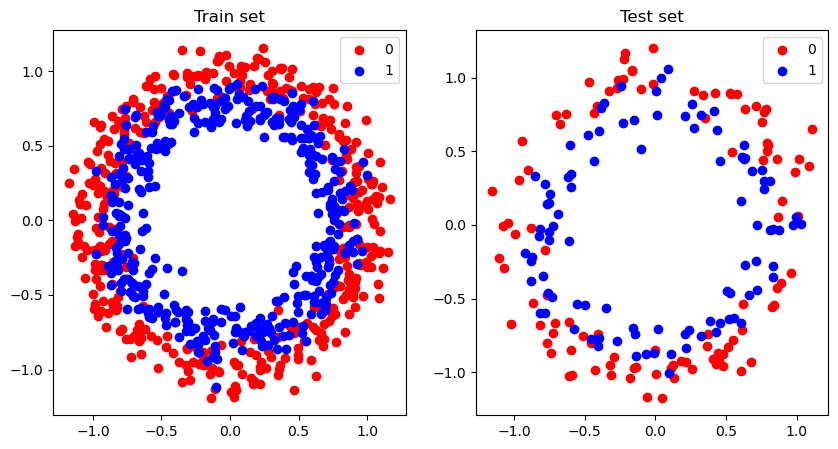

In [7]:
# 第二种数据集
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise=0.1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Visualize the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='1')
plt.title('Train set')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='1')
plt.title('Test set')
plt.legend()
plt.show()

In [8]:

# 将数据放入npMLP中
# one-hot编码
one_hot_encoder = OneHotEncoder(categories='auto')
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = one_hot_encoder.transform(y_test.reshape(-1, 1)).toarray()
# 训练模型
a = tm.time()
accuracy_list,accuracy_list_test,time,loss_list,loss_list_test = npMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test,False,1)
print('numpy time:',tm.time()-a)


Step: 0, Loss: 122.24679617639156, Accuracy: 0.68
Step: 10, Loss: 91.48354544457605, Accuracy: 0.79
Step: 20, Loss: 84.02493736769037, Accuracy: 0.81
Step: 30, Loss: 80.05142853691792, Accuracy: 0.855
Step: 40, Loss: 79.38524914638046, Accuracy: 0.85
Step: 50, Loss: 86.66610073970404, Accuracy: 0.81
Step: 60, Loss: 96.09825383151832, Accuracy: 0.81
Step: 70, Loss: 80.27218036801779, Accuracy: 0.84
Step: 80, Loss: 81.67200789584683, Accuracy: 0.84
Step: 90, Loss: 87.13925382453527, Accuracy: 0.815
Step: 100, Loss: 94.36581293401056, Accuracy: 0.79
Step: 110, Loss: 85.05321956773807, Accuracy: 0.82
Step: 120, Loss: 81.45653957645368, Accuracy: 0.835
Step: 130, Loss: 80.38092356544918, Accuracy: 0.835
Step: 140, Loss: 86.82827482851737, Accuracy: 0.81
Step: 150, Loss: 79.87337863689541, Accuracy: 0.84
Step: 160, Loss: 79.40720929530956, Accuracy: 0.83
Step: 170, Loss: 79.90747391784686, Accuracy: 0.86
Step: 180, Loss: 86.85941092685442, Accuracy: 0.81
Step: 190, Loss: 77.8333590577854, Ac

In [9]:

# 将数据放入pyMLP中
a = tm.time()
Py_accuracy_list,Py_accuracy_list_test,Py_loss_list,Py_loss_list_test = pyMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test)
print('pytorch time:',tm.time()-a)

Step:  0 train_Loss:  0.6840893030166626 train_Accuracy:  0.5487499833106995
Step:  0 test_Loss:  0.690483808517456 test_Accuracy:  0.5149999856948853
Step:  10 train_Loss:  0.5230901837348938 train_Accuracy:  0.7637500166893005
Step:  10 test_Loss:  0.5333985686302185 test_Accuracy:  0.7799999713897705
Step:  20 train_Loss:  0.37351980805397034 train_Accuracy:  0.8450000286102295
Step:  20 test_Loss:  0.4196113646030426 test_Accuracy:  0.8199999928474426
Step:  30 train_Loss:  0.35322147607803345 train_Accuracy:  0.8337500095367432
Step:  30 test_Loss:  0.42201051115989685 test_Accuracy:  0.8149999976158142
Step:  40 train_Loss:  0.33593931794166565 train_Accuracy:  0.8525000214576721
Step:  40 test_Loss:  0.3884906768798828 test_Accuracy:  0.8299999833106995
Step:  50 train_Loss:  0.32507815957069397 train_Accuracy:  0.8550000190734863
Step:  50 test_Loss:  0.3841073513031006 test_Accuracy:  0.8349999785423279
Step:  60 train_Loss:  0.338113397359848 train_Accuracy:  0.84874999523162

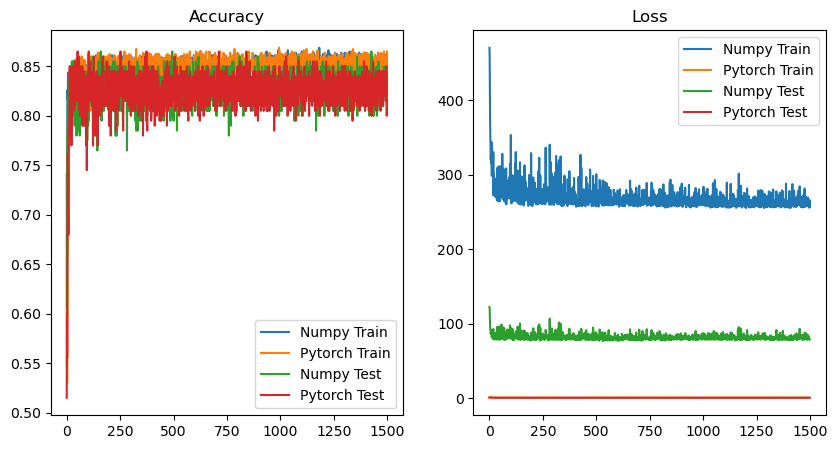

In [10]:

# 画图将两个模型的结果进行对比，分别画出训练集和测试集的准确率和损失函数
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy_list, label='Numpy Train')
plt.plot(Py_accuracy_list, label='Pytorch Train')
plt.plot(accuracy_list_test, label='Numpy Test')
plt.plot(Py_accuracy_list_test, label='Pytorch Test')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss_list, label='Numpy Train')
plt.plot(Py_loss_list, label='Pytorch Train')
plt.plot(loss_list_test, label='Numpy Test')
plt.plot(Py_loss_list_test, label='Pytorch Test')
plt.title('Loss')
plt.legend()
plt.show()

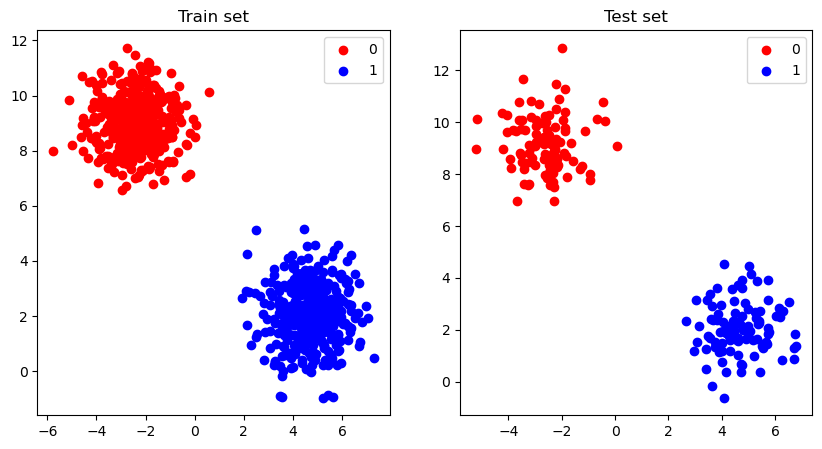

In [11]:
# 第三种数据集 
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Visualize the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='1')
plt.title('Train set')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='1')
plt.title('Test set')
plt.legend()
plt.show()




In [12]:
one_hot_encoder = OneHotEncoder(categories='auto')
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = one_hot_encoder.transform(y_test.reshape(-1, 1)).toarray()

In [13]:
a = tm.time()
accuracy_list,accuracy_list_test,time,loss_list,loss_list_test = npMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test,False,1)
print('numpy time:',tm.time()-a)

Step: 0, Loss: 0.02775287810314966, Accuracy: 1.0
Step: 10, Loss: 0.002377858353005013, Accuracy: 1.0
Step: 20, Loss: 0.0011885991373567495, Accuracy: 1.0
Step: 30, Loss: 0.0007782239327979499, Accuracy: 1.0
Step: 40, Loss: 0.00057346882590163, Accuracy: 1.0
Step: 50, Loss: 0.0004522034287745946, Accuracy: 1.0
Step: 60, Loss: 0.00037286327033277675, Accuracy: 1.0
Step: 70, Loss: 0.0003172436109412809, Accuracy: 1.0
Step: 80, Loss: 0.0002766339887111873, Accuracy: 1.0
Step: 90, Loss: 0.00024475139778450675, Accuracy: 1.0
Step: 100, Loss: 0.00021916027715319637, Accuracy: 1.0
Step: 110, Loss: 0.00019812573681585863, Accuracy: 1.0
Step: 120, Loss: 0.00018065283739108768, Accuracy: 1.0
Step: 130, Loss: 0.00016586226279398028, Accuracy: 1.0
Step: 140, Loss: 0.0001532053690175695, Accuracy: 1.0
Step: 150, Loss: 0.00014225196973343418, Accuracy: 1.0
Step: 160, Loss: 0.00013266810396679073, Accuracy: 1.0
Step: 170, Loss: 0.00012421914523115033, Accuracy: 1.0
Step: 180, Loss: 0.0001167368268901

In [14]:
a = tm.time()
Py_accuracy_list,Py_accuracy_list_test,Py_loss_list,Py_loss_list_test = pyMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test)
print('pytorch time:',tm.time()-a)

Step:  0 train_Loss:  0.0030414066277444363 train_Accuracy:  1.0
Step:  0 test_Loss:  0.002165478654205799 test_Accuracy:  1.0
Step:  10 train_Loss:  0.00032011777511797845 train_Accuracy:  1.0
Step:  10 test_Loss:  0.00014026513963472098 test_Accuracy:  1.0
Step:  20 train_Loss:  0.0001718877028906718 train_Accuracy:  1.0
Step:  20 test_Loss:  6.420689896913245e-05 test_Accuracy:  1.0
Step:  30 train_Loss:  0.00011737587192328647 train_Accuracy:  1.0
Step:  30 test_Loss:  3.990012191934511e-05 test_Accuracy:  1.0
Step:  40 train_Loss:  8.894396160030738e-05 train_Accuracy:  1.0
Step:  40 test_Loss:  2.823582326527685e-05 test_Accuracy:  1.0
Step:  50 train_Loss:  7.147986616473645e-05 train_Accuracy:  1.0
Step:  50 test_Loss:  2.1498153728316538e-05 test_Accuracy:  1.0
Step:  60 train_Loss:  5.966676690150052e-05 train_Accuracy:  1.0
Step:  60 test_Loss:  1.721063017612323e-05 test_Accuracy:  1.0
Step:  70 train_Loss:  5.114519808557816e-05 train_Accuracy:  1.0
Step:  70 test_Loss:  1

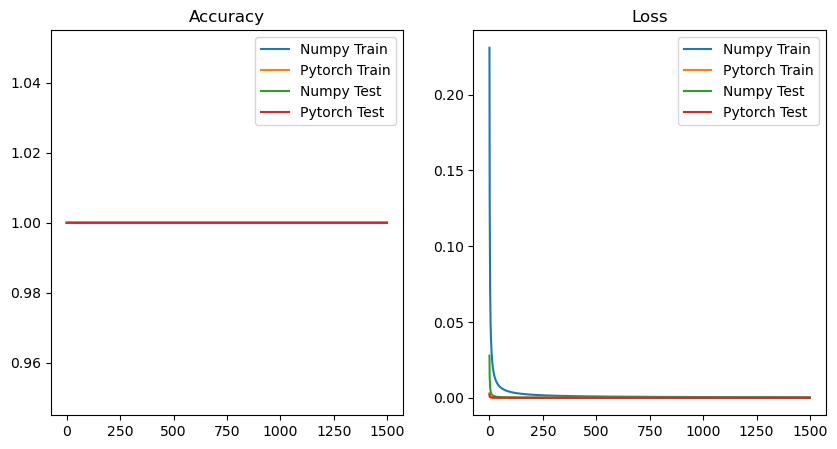

In [15]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy_list, label='Numpy Train')
plt.plot(Py_accuracy_list, label='Pytorch Train')
plt.plot(accuracy_list_test, label='Numpy Test')
plt.plot(Py_accuracy_list_test, label='Pytorch Test')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss_list, label='Numpy Train')
plt.plot(Py_loss_list, label='Pytorch Train')
plt.plot(loss_list_test, label='Numpy Test')
plt.plot(Py_loss_list_test, label='Pytorch Test')
plt.title('Loss')
plt.legend()
plt.show()

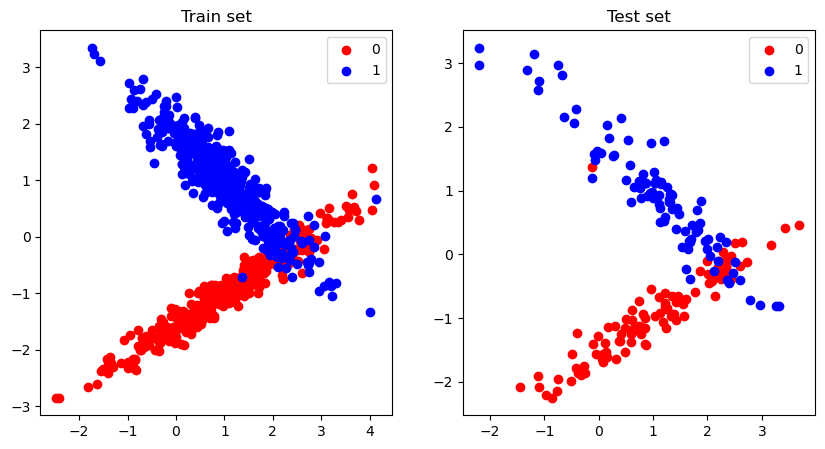

In [16]:
#第四种数据集 
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Visualize the data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='blue', label='1')
plt.title('Train set')
plt.legend()
plt.subplot(1, 2, 2)
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='0')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='1')
plt.title('Test set')
plt.legend()
plt.show()

In [17]:

one_hot_encoder = OneHotEncoder(categories='auto')
y_train = one_hot_encoder.fit_transform(y_train.reshape(-1, 1)).toarray()
y_test = one_hot_encoder.transform(y_test.reshape(-1, 1)).toarray()

In [18]:

a = tm.time()
accuracy_list,accuracy_list_test,time,loss_list,loss_list_test = npMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test,False,1)
print('numpy time:',tm.time()-a)

Step: 0, Loss: 61.59270182285694, Accuracy: 0.835
Step: 10, Loss: 45.187509280293746, Accuracy: 0.905
Step: 20, Loss: 55.594326921661576, Accuracy: 0.865
Step: 30, Loss: 39.5763903934248, Accuracy: 0.955
Step: 40, Loss: 42.5586256926642, Accuracy: 0.905
Step: 50, Loss: 39.277750688622646, Accuracy: 0.94
Step: 60, Loss: 41.137234113352605, Accuracy: 0.91
Step: 70, Loss: 39.02613092208288, Accuracy: 0.95
Step: 80, Loss: 38.27112812722552, Accuracy: 0.945
Step: 90, Loss: 37.331861007676686, Accuracy: 0.945
Step: 100, Loss: 37.5386813495004, Accuracy: 0.94
Step: 110, Loss: 39.68695146643002, Accuracy: 0.915
Step: 120, Loss: 38.25235229257409, Accuracy: 0.935
Step: 130, Loss: 37.320214738645106, Accuracy: 0.94
Step: 140, Loss: 35.44465113214119, Accuracy: 0.94
Step: 150, Loss: 34.68740461132387, Accuracy: 0.95
Step: 160, Loss: 35.41510955348474, Accuracy: 0.94
Step: 170, Loss: 35.07454922222065, Accuracy: 0.94
Step: 180, Loss: 40.73915102191729, Accuracy: 0.9
Step: 190, Loss: 33.85176776634

In [19]:

a = tm.time()
Py_accuracy_list,Py_accuracy_list_test,Py_loss_list,Py_loss_list_test = pyMLP.train(DNN_HIDDEN_UNITS_DEFAULT,LEARNING_RATE_DEFAULT,MAX_EPOCHS_DEFAULT,EVAL_FREQ_DEFAULT,X_train,X_test,y_train,y_test)
print('pytorch time:',tm.time()-a)


Step:  0 train_Loss:  0.2508258819580078 train_Accuracy:  0.8899999856948853
Step:  0 test_Loss:  0.27855753898620605 test_Accuracy:  0.8450000286102295
Step:  10 train_Loss:  0.16397185623645782 train_Accuracy:  0.9137499928474426
Step:  10 test_Loss:  0.2259269654750824 test_Accuracy:  0.8600000143051147
Step:  20 train_Loss:  0.14159291982650757 train_Accuracy:  0.9375
Step:  20 test_Loss:  0.21274450421333313 test_Accuracy:  0.9150000214576721
Step:  30 train_Loss:  0.14801380038261414 train_Accuracy:  0.9350000023841858
Step:  30 test_Loss:  0.2196306586265564 test_Accuracy:  0.9150000214576721
Step:  40 train_Loss:  0.1321367770433426 train_Accuracy:  0.9512500166893005
Step:  40 test_Loss:  0.20245559513568878 test_Accuracy:  0.9350000023841858
Step:  50 train_Loss:  0.13595372438430786 train_Accuracy:  0.949999988079071
Step:  50 test_Loss:  0.20692291855812073 test_Accuracy:  0.949999988079071
Step:  60 train_Loss:  0.1495484709739685 train_Accuracy:  0.9300000071525574
Step: 

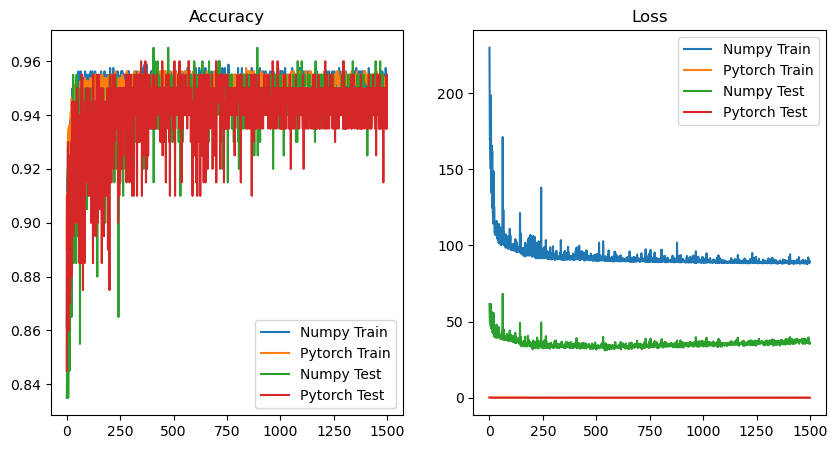

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(accuracy_list, label='Numpy Train')
plt.plot(Py_accuracy_list, label='Pytorch Train')
plt.plot(accuracy_list_test, label='Numpy Test')
plt.plot(Py_accuracy_list_test, label='Pytorch Test')
plt.title('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(loss_list, label='Numpy Train')
plt.plot(Py_loss_list, label='Pytorch Train')
plt.plot(loss_list_test, label='Numpy Test')
plt.plot(Py_loss_list_test, label='Pytorch Test')
plt.title('Loss')
plt.legend()
plt.show()